# Total Production Units for Self-Consumption

### Master in Data Science and Engineering - FEUP

#### Group 4
202107955 - Beatriz Iara Nunes Silva
\
202206252 - Inês Clotilde da Costa Neves
\
202502527 - Kirill Savin
\
202502528 - Mariana Rocha Cristino
\
202202895 - Patrícia Crespo da Silva

<div id="top"></div>

# Six-Step Statistical Investigation Method

* Define|Ask a Research Question
* Design a study and collect Data (Step will be skipped)
* Explore the Data
* Draw inferences
* Formulate Conclusions
* Look back & ahead

# Table of Content

<ol>
    <li><h3><a href="#introduction">Introduction</a></h3></li>
    <li><h3><a href="#research">Research Questions</a></h3></li>
    <li><h3><a href="#data">Data</a></h3></li>
    <li><h3><a href="#inference">Inferences</a></h3></li>
    <li><h3><a href="#results">Results and Discussion</a></h3></li>
    <li><h3><a href="#conclusion">Conclusion</a></h3></li>    

</ol>

# Introduction


<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Research Questions

# Research Questions

**General Research Question:**
* RQ: Compare how seasonal (winter vs summer), regional, and technical factors shape self-consumption energy production patterns in Portugal between 2023 and 2024.

**Specifics Research Questions:**
* RQ1: Compare the average installed capacity per UPAC across different power levels and districts in 2023 and 2024. - Kirill
* RQ2: Compare the evolution of installed capacity between 2023 and 2024 across residential and industrial UPACs to assess differences in growth patterns. - Iara and Mariana
* RQ3: Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024. - Inês and Patrícia

Districts for SRQ: Aveiro, Évora, Vila Real and Faro

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Data

## Libraries

In [ ]:
#import geopandas as gpd
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import scikit_posthocs as sp
from scipy.stats import kruskal, levene
from statsmodels.formula.api import ols


## Prepare Data

Reading the dataset:

In [4]:
df_origin = pd.read_csv('../Data/UPAC_Total_Production.csv', sep=';', decimal='.')
df_origin.head(10)

,Quarter,District,Municipality,Parish,Zip Code,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),DistrictCode,Municipality Code,DistrictMunicipalityParishCode,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,3150,Solar,BTN,"]0, 4]",2,3.00,6,604,060407,9537.0,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,3150,Solar,BTN,"]0, 4]",2,4.32,6,604,060410,9537.0,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,3150,Não Atribuído,BTN,"]0, 4]",1,1.05,6,604,060411,9537.0,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,3150,Solar,BTN,"]0, 4]",17,28.14,6,604,060413,9537.0,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,3090,Não Atribuído,BTN,"]0, 4]",2,3.28,6,605,060514,50436.0,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,3080,Não Atribuído,BTN,"]0, 4]",1,2.00,6,605,060518,50436.0,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Não Atribuído,BTN,"]0, 4]",9,13.59,6,605,060520,50436.0,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Solar,BTN,"]0, 4]",128,202.51,6,605,060520,50436.0,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,3090,Não Atribuído,BTN,"]0, 4]",3,4.96,6,605,060521,50436.0,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,3090,Solar,BTN,"]0, 4]",93,112.51,6,605,060522,50436.0,0.001844,0.002231


Rename the last two columns to English - Iara

In [5]:
df_origin = df_origin.rename(columns={
    "relacao_instalacoes_por_cpe": "installations_per_cpe_ratio",
    "relacao_potencia_por_cpe": "power_per_cpe_ratio"
})
print(df_origin.columns)

Index(['Quarter', 'District', 'Municipality', 'Parish', 'Zip Code',
       'Technology Type', 'Voltage level', 'Installed power range (kW)',
       'Number of installations', 'Total installed power (kW)', 'DistrictCode',
       'Municipality Code', 'DistrictMunicipalityParishCode', 'CPEs (#)',
       'installations_per_cpe_ratio', 'power_per_cpe_ratio'],
      dtype='object')


Dataset info - Mariana and Patrícia

In [6]:
print("\nDataset info:")
print(df_origin.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121294 entries, 0 to 121293
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Quarter                         121294 non-null  object 
 1   District                        121294 non-null  object 
 2   Municipality                    121294 non-null  object 
 3   Parish                          121294 non-null  object 
 4   Zip Code                        121294 non-null  int64  
 5   Technology Type                 121283 non-null  object 
 6   Voltage level                   121292 non-null  object 
 7   Installed power range (kW)      121294 non-null  object 
 8   Number of installations         121294 non-null  int64  
 9   Total installed power (kW)      121294 non-null  float64
 10  DistrictCode                    121294 non-null  int64  
 11  Municipality Code               121294 non-null  int64  
 12  D

Non-Numeric Columns - Iara

In [7]:
non_numeric = df_origin.select_dtypes(exclude=['number'])


for col in non_numeric.columns:
    unique_vals = df_origin[col].unique().tolist()
    print(f"Column: {col} — {len(unique_vals)} unique values")
    print(unique_vals)
    print("-" * 40)

Column: Quarter — 11 unique values
['2023T1', '2023T2', '2024T2', '2024T3', '2024T4', '2023T3', '2023T4', '2024T1', '2025T1', '2025T2', '2022T4']
----------------------------------------
Column: District — 18 unique values
['Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre', 'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real', 'Viseu', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco']
----------------------------------------
Column: Municipality — 278 unique values
['Condeixa-a-Nova', 'Figueira da Foz', 'Lousã', 'Mira', 'Miranda do Corvo', 'Montemor-o-Velho', 'Oliveira do Hospital', 'Pampilhosa da Serra', 'Penacova', 'Penela', 'Soure', 'Tábua', 'Vila Nova de Poiares', 'Alandroal', 'Arraiolos', 'Borba', 'Estremoz', 'Évora', 'Montemor-o-Novo', 'Mora', 'Portel', 'Redondo', 'Reguengos de Monsaraz', 'Vendas Novas', 'Viana do Alentejo', 'Vila Viçosa', 'Albufeira', 'Alcoutim', 'Aljezur', 'Castro Marim', 'Faro', 'Lagoa', 'Lagos', 'Loulé', 'Monchique', 'Ol

Translation Dictionary Technology Type - Iara

In [8]:
tech_type_translation = {
    'Solar': 'Solar',
    'Não Atribuído': 'Not Assigned',
    'Eólica': 'Wind',
    'Biogás': 'Biogas',
    'Cogeração não renovável': 'Non-renewable Cogeneration',
    'Hídrica': 'Hydro',
    'Biomassa': 'Biomass',
    'Fotovoltaica': 'Photovoltaic'
}

df_origin['Technology Type'] = df_origin['Technology Type'].map(tech_type_translation).fillna(df_origin['Technology Type'])
print(df_origin['Technology Type'].unique())


['Solar' 'Not Assigned' 'Wind' 'Biogas' 'Non-renewable Cogeneration'
 'Hydro' 'Biomass' 'Photovoltaic' nan]


### Data Selection

Removing unnecessary columns - All of us (Patrícia include the last 3, Iara and Inês didn't)

In [9]:
cols_to_keep = [
    "Quarter",
    "District",
    "Municipality",
    "Parish",
    "Technology Type",
    "Voltage level",
    "Installed power range (kW)",
    "Number of installations",
    "Total installed power (kW)",
    "CPEs (#)",
    "installations_per_cpe_ratio",
    "power_per_cpe_ratio"
]

df_filtered = df_origin[cols_to_keep]
df_filtered.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231


Selecting years of interest - All of us

In [10]:
df_filtered = df_filtered[df_filtered['Quarter'].str.startswith(('2023', '2024'))].copy()
print(df_filtered['Quarter'].value_counts())

Quarter
2023T3    13295
2024T4    11737
2024T3    11399
2024T2    11086
2024T1    10839
2023T1    10481
2023T4    10407
2023T2     9301
Name: count, dtype: int64


### Data Inspection and Cleaning

Checking for missing values - All of us

In [11]:
missing_df = pd.DataFrame({
    'Missing Values': df_filtered.isnull().sum(),
    'Percentage': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})
print("\nMissing Values summary:")
display(missing_df[missing_df['Missing Values'] > 0])


Missing Values summary:


,Missing Values,Percentage
Voltage level,2,0.002259


In [12]:
print("Before dropping NA:", df_filtered.shape)
df_filtered = df_filtered.dropna()
print("After dropping NA:", df_filtered.shape)

Before dropping NA: (88545, 12)
After dropping NA: (88543, 12)


Check for duplicate rows - Inês and Iara

In [13]:
duplicates = df_filtered[df_filtered.duplicated()]
print(duplicates)
print("Number of duplicates:", df_filtered.duplicated().sum())

       Quarter  District         Municipality  \
3666    2024T2     Braga             Barcelos   
9221    2024T4    Lisboa                Mafra   
11106   2023T4      Faro                Loulé   
14824   2024T2      Faro                Loulé   
43536   2024T3  Santarém  Salvaterra de Magos   
44840   2023T2     Évora                Évora   
45738   2023T2     Braga            Guimarães   
54983   2024T1      Faro                Loulé   
56600   2024T1    Lisboa               Lisboa   
57315   2023T3     Porto           Matosinhos   
59164   2023T4     Évora                Évora   
62981   2024T2    Lisboa               Loures   
67272   2024T3    Lisboa               Lisboa   
68366   2024T3    Lisboa              Amadora   
87473   2023T4     Braga             Barcelos   
94814   2024T1    Lisboa              Amadora   
96966   2024T2  Santarém  Salvaterra de Magos   
97491   2024T2    Lisboa               Lisboa   
97935   2023T4    Lisboa              Amadora   
99945   2024T1    Li

In [14]:
print("Before dropping duplicates:", df_filtered.shape)
df_filtered = df_filtered.drop_duplicates()
print("After dropping duplicates:", df_filtered.shape)

Before dropping duplicates: (88543, 12)
After dropping duplicates: (88511, 12)


### Derived Metrics - Iara

**Percentage of Installations by Voltage Level per District**

According to E-redes ([Manual de Ligações à Rede](https://provedordocliente.e-redes.pt/Files/PDF/Manual-de-Ligacoes-a-Rede.pdf)):

*High Voltage (AT)*
- Companies with capacities >10 MVA, supplied at 60 kV.
- Clear proxy for heavy industry or large commercial facilities.
- Districts with a higher proportion of AT installations → more industrialized.

*Medium Voltage (MT)*
- Companies with capacities >200 kVA, voltages of 10–30 kV.
- Also indicates industrial activity or large commercial companies.
- Complements AT; districts with a higher proportion of MT → more industrialized areas, but less intense than AT.

*Low Voltage Normal (BTN) and Low Voltage Special (BTE)*
- **BTN** → residences, small shops/offices.
- **BTE** → small/medium companies (>41.4 kVA).
- Districts dominated by BTN → mainly residential areas.
- BTE is mixed, can indicate areas with small industries or commerce, but less significant than MT/AT.


In [15]:
# Make a copy
df = df_filtered.copy()

# Group by Quarter, District, and Voltage level, summing the Number of installations
grouped = (
    df.groupby(['Quarter', 'District', 'Voltage level'], as_index=False)['Number of installations'].sum()
)

# Pivot table to have Voltage levels as columns
pivot = grouped.pivot_table(
    index=['Quarter', 'District'],
    columns='Voltage level',
    values='Number of installations',
    fill_value=0
).reset_index()

# Ensure all expected voltage columns exist
for col in ['AT', 'MT', 'BTN', 'BTE']:
    if col not in pivot.columns:
        pivot[col] = 0

# Calculate total installations per row
pivot['Total'] = pivot[['AT','MT','BTN','BTE']].sum(axis=1)

# Calculate percentage per voltage level
pivot["District_High_Voltage_AT(%)"] = pivot['AT'] / pivot['Total'] * 100
pivot["District_Medium_Voltage_MT(%)"] = pivot['MT'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTN(%)"] = pivot['BTN'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTE(%)"] = pivot['BTE'] / pivot['Total'] * 100

# Select only the relevant columns
df_result = pivot[['Quarter', 'District',
                   'District_High_Voltage_AT(%)',
                   'District_Medium_Voltage_MT(%)',
                   'District_Low_Voltage_BTN(%)',
                   'District_Low_Voltage_BTE(%)']]

df_result


Voltage level,Quarter,District,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Aveiro,0.052687,3.819810,94.362487,1.765016
1,2023T1,Beja,0.000000,3.415560,92.979127,3.605313
2,2023T1,Braga,0.022525,2.201825,96.564928,1.210722
3,2023T1,Bragança,0.000000,1.640241,95.899399,2.460361
4,2023T1,Castelo Branco,0.064767,2.428756,95.401554,2.104922
...,...,...,...,...,...,...
139,2024T4,Setúbal,0.027293,1.305495,97.643741,1.023472
140,2024T4,Viana do Castelo,0.014778,1.728979,97.103591,1.152653
141,2024T4,Vila Real,0.000000,1.651020,97.134995,1.213985
142,2024T4,Viseu,0.016521,2.602016,96.241533,1.139931


In [16]:
df_final = df_filtered.merge(df_result, on=['Quarter', 'District'], how='left')
df_final.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315,0.041147,1.796736,96.872857,1.289261
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453,0.041147,1.796736,96.872857,1.289261
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110,0.041147,1.796736,96.872857,1.289261
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951,0.041147,1.796736,96.872857,1.289261
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065,0.041147,1.796736,96.872857,1.289261
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040,0.041147,1.796736,96.872857,1.289261
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269,0.041147,1.796736,96.872857,1.289261
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015,0.041147,1.796736,96.872857,1.289261
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098,0.041147,1.796736,96.872857,1.289261
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231,0.041147,1.796736,96.872857,1.289261


**Map Quarters to Seasons** - Iara

In [17]:
# Function to convert Quarter to Season
def quarter_to_season(quarter):
    if quarter.endswith('T1') or quarter.endswith('T2'):
        return 'Winter'
    elif quarter.endswith('T3') or quarter.endswith('T4'):
        return 'Summer'
    else:
        return 'Unknown'

# Apply the function to create a new Season column
df_final['Season'] = df_final['Quarter'].apply(quarter_to_season)

# Display first 10 rows
df_final.head(10)


,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.00,9537.0,0.000210,0.000315,0.041147,1.796736,96.872857,1.289261,Winter
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.32,9537.0,0.000210,0.000453,0.041147,1.796736,96.872857,1.289261,Winter
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,9537.0,0.000105,0.000110,0.041147,1.796736,96.872857,1.289261,Winter
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.14,9537.0,0.001783,0.002951,0.041147,1.796736,96.872857,1.289261,Winter
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.28,50436.0,0.000040,0.000065,0.041147,1.796736,96.872857,1.289261,Winter
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.00,50436.0,0.000020,0.000040,0.041147,1.796736,96.872857,1.289261,Winter
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.59,50436.0,0.000178,0.000269,0.041147,1.796736,96.872857,1.289261,Winter
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.51,50436.0,0.002538,0.004015,0.041147,1.796736,96.872857,1.289261,Winter
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.96,50436.0,0.000059,0.000098,0.041147,1.796736,96.872857,1.289261,Winter
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.51,50436.0,0.001844,0.002231,0.041147,1.796736,96.872857,1.289261,Winter


Check final data types

In [18]:
df_final.dtypes

Quarter                           object
District                          object
Municipality                      object
Parish                            object
Technology Type                   object
Voltage level                     object
Installed power range (kW)        object
Number of installations            int64
Total installed power (kW)       float64
CPEs (#)                         float64
installations_per_cpe_ratio      float64
power_per_cpe_ratio              float64
District_High_Voltage_AT(%)      float64
District_Medium_Voltage_MT(%)    float64
District_Low_Voltage_BTN(%)      float64
District_Low_Voltage_BTE(%)      float64
Season                            object
dtype: object

**Summary of numeric variables** - Patrícia

In [19]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of installations,88511.0,17.484414,58.117527,1.000000,1.000000,2.000000,8.000000,2118.000000
Total installed power (kW),88511.0,122.137273,383.756280,0.000000,14.050000,30.000000,82.795000,19600.000000
CPEs (#),88511.0,45229.553615,60332.903272,1260.000000,10911.000000,27430.000000,57414.000000,399456.000000
installations_per_cpe_ratio,88511.0,0.000824,0.002353,0.000003,0.000036,0.000117,0.000492,0.052016
power_per_cpe_ratio,88511.0,0.005886,0.031139,0.000000,0.000470,0.001444,0.004071,3.203661
District_High_Voltage_AT(%),88511.0,0.016606,0.017188,0.000000,0.003992,0.012109,0.022525,0.075075
District_Medium_Voltage_MT(%),88511.0,2.501376,0.792136,0.893764,1.974736,2.461085,2.685493,4.699666
District_Low_Voltage_BTN(%),88511.0,95.675196,1.288820,89.988877,95.281230,95.899399,96.380047,98.293723
District_Low_Voltage_BTE(%),88511.0,1.806821,0.719718,0.805742,1.235248,1.765016,2.093719,5.283648


**Number of installations**

Average: 17.47 → on average, each record has ~18 installations.

Standard deviation: 58.11 → high, indicating great variability between municipalities/records.

Distribution: median = 2, 25% = 1, 75% = 8 → asymmetric: most records have few installations, but some have extremely high values (max = 2118), possibly outliers or large production centers.

**Total Installed Power UPAC (kW)**

Average: 122.10 kW → relatively low considering that there are large outliers.

Standard deviation: 383.69 kW → very high, again showing strong variability.

Quartiles: 25% = 14.04 kW, median = 30.00 kW, 75% = 82.79 kW

Maximum: 19,600 kW → indicates the existence of some very large installations.

Conclusion: most units are small, but there are large installations that greatly increase the average.

# Data Exploration

# Inference
In this section, inferential analyses were conducted to statistically test the relationships and differences identified during the exploratory phase. By applying appropriate inferential methods, the goal was to validate the observed trends and address the specific research questions, ensuring the robustness of the conclusions regarding self-consumption energy production and installation patterns in Portugal between 2023 and 2024.

## 2: Compare the evolution of installed capacity between 2023 and 2024 across residential and industrial UPACs to assess differences in growth patterns.

This research question examines how the installed capacity for self-consumption evolved between 2023 and 2024 across residential and industrial UPACs, focusing on four selected districts: Aveiro, Évora, Vila Real, and Faro. The analysis investigates differences both within each sector across years and between sectors, while accounting for regional variation.

The mean installed capacity for Residential UPACs across the selected districts and years is denoted as $\mu_{R}$, and for Industrial UPACs as $\mu_{I}$.

**Variable Definitions:**
- $\mu_{R}$: mean installed capacity for Residential UPACs across selected districts and years.
- $\mu_{I}$: mean installed capacity for Industrial UPACs across selected districts and years


**Hypotheses**

For this analysis, the following null and alternative hypotheses were defined to assess differences in installed capacity across sectors, districts, and their interaction.

- *Effect of Type (Residential vs Industrial):*

$$
H_0: \mu_R = \mu_I \\
H_1: \mu_R \neq \mu_I
$$

- *Effect of District:*

$$
H_0: \mu_{\text{Aveiro}} = \mu_{\text{Évora}} = \mu_{\text{Vila Real}} = \mu_{\text{Faro}} \\
H_1: \text{At least one district mean differs}
$$

- *Interaction Effect (Type × District):*

$$
H_0: \text{No interaction between Type and District} \\
H_1: \text{There is a significant interaction between Type and District}
$$


**Statistical Test and Assumptions**

To test these hypotheses, a two-way ANOVA would be applied, with factors Type (Residential vs Industrial) and District. To do so, the following assumptions must be verified:

- **Independence**: Observations are independent of each other.
- **Normality**: The residuals of the dependent variable (installed capacity) are approximately normally distributed within each group.

- **Homogeneity of variances**: The variance of installed capacity is similar across groups.




In [31]:
df=df_final

The dataset was first filtered to include only the districts of Aveiro, Évora, Vila Real, and Faro.

The voltage levels were then mapped to define the Type of UPAC as either "Residential" or "Industrial," and entries outside these two categories were excluded.

Finally, the year and quarter were extracted from the Quarter column to facilitate temporal analysis.

In [32]:
# --- Filter districts ---
districts = ['Aveiro','Évora','Vila Real','Faro']
df_sample = df[df['District'].isin(districts)].copy()

# --- Map Voltage to Type ---
df_sample['Type'] = df_sample['Voltage level'].map({
    'AT':'Industrial',
    'MT':'Industrial',
    'BTN':'Residential',
    'BTE':'Residential'
})
df_sample = df_sample[df_sample['Type'].isin(['Residential','Industrial'])]

# --- Extract Year and Quarter ---
df_sample['Year'] = df_sample['Quarter'].str[:4].astype(int)
df_sample['Quarter_num'] = df_sample['Quarter'].str[5:]  # e.g., Q1, Q2

A stratified random sample was then taken from the filtered dataset to ensure that each group defined by District, Type, and Year had the same sample size, while keeping the sample at most 10% of the population. This stratification preserves the relative structure of the data across groups, and the limited sample size allows the Central Limit Theorem to justify the approximation of the sample means to a normal distribution, which is necessary for the subsequent ANOVA analysis.

In [33]:
# --- Estratified sample (same size per group, <=10% da população) ---
group_sizes = df_sample.groupby(['District','Type','Year']).size()
sample_size = min(int(len(df_sample)*0.1), group_sizes.min())

df_sample = (
    df_sample
    .groupby(['District','Type','Year'], group_keys=False)
    .apply(lambda x: x.sample(n=sample_size, random_state=27))
)

# --- Print the size of each group ---
group_counts = df_sample.groupby(['District','Type','Year']).size()
print("Size of each group after stratified sampling:\n")
print(group_counts)


Size of each group after stratified sampling:

District   Type         Year
Aveiro     Industrial   2023    198
                        2024    198
           Residential  2023    198
                        2024    198
Faro       Industrial   2023    198
                        2024    198
           Residential  2023    198
                        2024    198
Vila Real  Industrial   2023    198
                        2024    198
           Residential  2023    198
                        2024    198
Évora      Industrial   2023    198
                        2024    198
           Residential  2023    198
                        2024    198
dtype: int64


C:\Users\iaras\AppData\Local\Temp\ipykernel_16848\2287629961.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=sample_size, random_state=27))


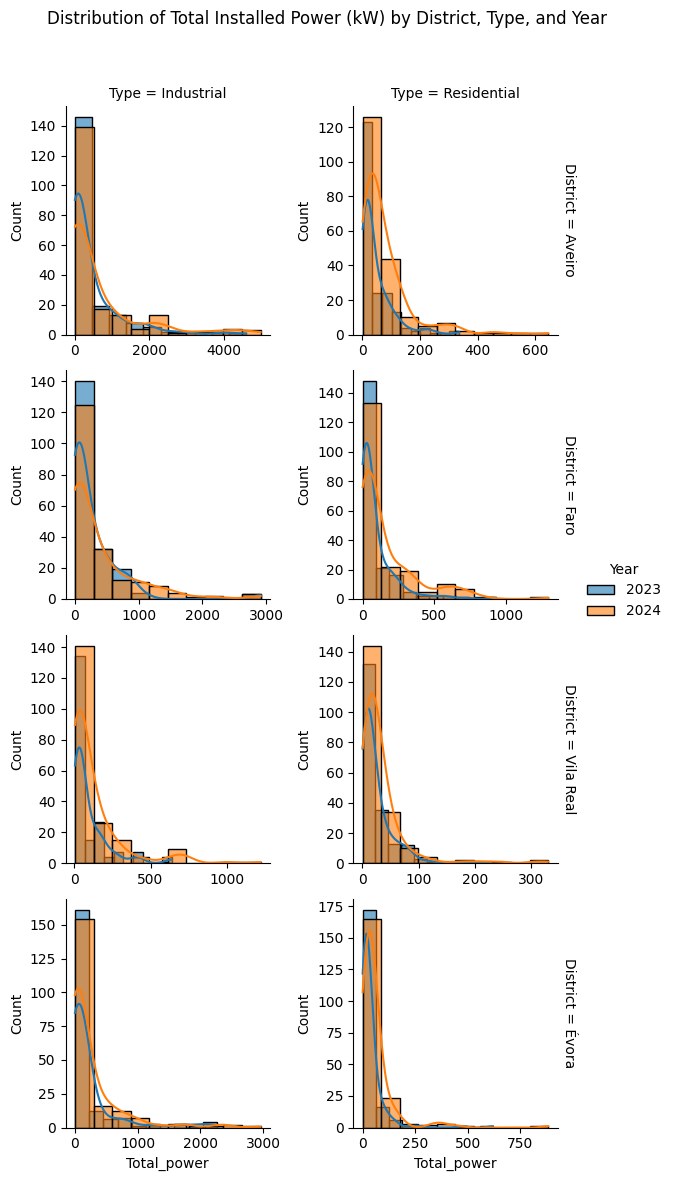

In [38]:
# --- Histogram of Total_power by District, Type, and Year ---
g = sns.FacetGrid(df_sample, row='District', col='Type', hue='Year', margin_titles=True, sharex=False, sharey=False)
g.map(sns.histplot, 'Total_power', bins=10, kde=True, alpha=0.6)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Total Installed Power (kW) by District, Type, and Year")
plt.show()

Before performing the ANOVA, Levene’s test was applied to assess the assumption of homogeneity of variances between Residential and Industrial UPACs. This test evaluates whether the variance of Total_power is similar across the two sectors, which is a key requirement for valid ANOVA results.

In [35]:
# --- Sort data ---
df_sample.sort_values(['District','Type','Municipality','Quarter'], inplace=True)

# --- Rename column for convenience ---
df_sample = df_sample.rename(columns={"Total installed power (kW)": "Total_power"})

# --- Levene Test for equal variances ---
stat_levene, p_levene = levene(
    df_sample[df_sample['Type']=='Residential']['Total_power'],
    df_sample[df_sample['Type']=='Industrial']['Total_power']
)
print(f"\nLevene Test: W={stat_levene:.3f}, p={p_levene:}")


Levene Test: W=220.123, p=3.408033007237363e-48


Levene’s test for homogeneity of variances yielded a statistic of **W = 220.123** with a **p-value < 0.001** (specifically, p = 3.41 × 10⁻⁴⁸), indicating that the assumption of equal variances between Residential and Industrial UPACs is **not satisfied**.

This result suggests that the variability in installed capacity differs significantly between the two sectors, which should be considered when interpreting the ANOVA results.

A **two-way ANOVA** was performed to assess the effects of **Type** (Residential vs Industrial), **District**, and their interaction on **Total Power Installed**. The model used was:

$$
\text{Total\_power} \sim C(\text{Type}) * C(\text{District})
$$


This analysis tests whether mean installed capacity differs between sectors, across districts, and whether the effect of sector depends on the district.

Given the results of Levene’s test, which indicated unequal variances between Residential and Industrial UPACs, a robust two-way ANOVA was applied.

This was implemented using a heteroscedasticity-consistent covariance estimator (HC3) in the OLS model, which adjusts the standard errors and F-tests to account for variance heterogeneity while keeping the same factorial structure.


In [43]:
# --- Three-way robust ANOVA including Year ---
model = ols('Total_power ~ C(Type) * C(District) * C(Year)', data=df_sample).fit(cov_type='HC3')
anova_table_robust = sm.stats.anova_lm(model, typ=2)

pd.reset_option('display.float_format')
print("\nThree-way Robust ANOVA (Type x District x Year) results:\n")
anova_table_robust



Three-way Robust ANOVA (Type x District x Year) results:



,sum_sq,df,F,PR(>F)
C(Type),5.645567e+07,1.0,415.323520,3.903325e-91
C(District),2.014449e+08,3.0,493.985254,1.135740e-306
C(Year),3.786930e+07,1.0,278.590510,5.257206e-62
C(Type):C(District),4.340800e+07,3.0,106.445556,3.225523e-68
C(Type):C(Year),1.011151e+06,1.0,7.438666,6.390861e-03
C(District):C(Year),8.212567e+06,3.0,20.138943,5.066696e-13
C(Type):C(District):C(Year),1.211288e+06,3.0,2.970334,3.052915e-02
Residual,2.119176e+09,15590.0,NaN,NaN


The robust three-way ANOVA results indicate that **Type** (Residential vs Industrial) has a highly significant effect on installed capacity (F = 415.32, p < 0.001), confirming that Industrial and Residential UPACs differ substantially in their mean installed power.

**District** also shows a highly significant effect (F = 493.99, p < 0.001), indicating notable differences in installed capacity across the four regions.

Similarly, **Year** has a significant effect (F = 278.59, p < 0.001), reflecting overall growth in installed capacity between 2023 and 2024.

Several interactions are also significant:

- **Type × District** (F = 106.45, p < 0.001) demonstrates that the difference between Residential and Industrial UPACs varies depending on the district.
- **Type × Year** (F = 7.44, p = 0.006) shows that the sector difference changes slightly between years.
- **District × Year** (F = 20.14, p < 0.001) indicates that district effects vary across years.
- **Type × District × Year** (F = 2.97, p = 0.03) reveals a small but significant combined effect of sector, district, and year.

These results reinforce the importance of examining **sector- and district-specific patterns over time**, rather than relying solely on overall averages, and justify the use of a robust approach given the unequal variances observed in Levene’s test.




C:\Users\iaras\AppData\Local\Temp\ipykernel_16848\1956257679.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


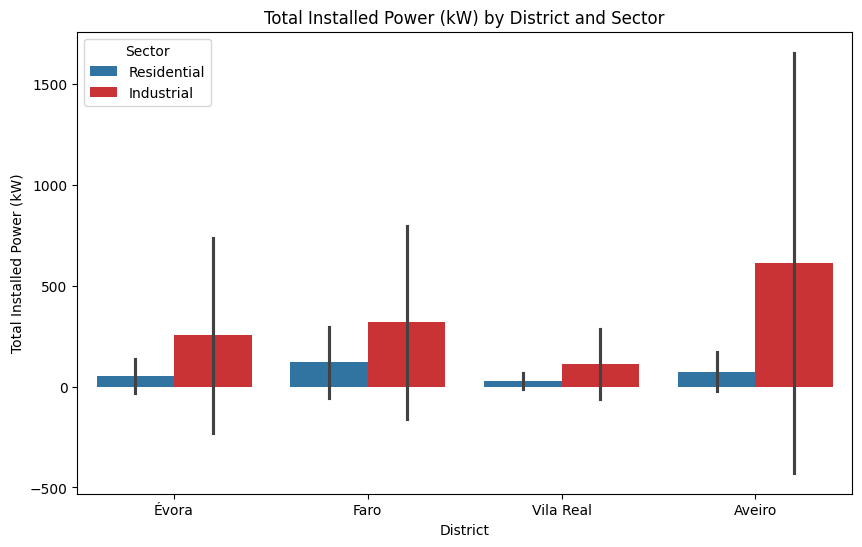

C:\Users\iaras\AppData\Local\Temp\ipykernel_16848\1956257679.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


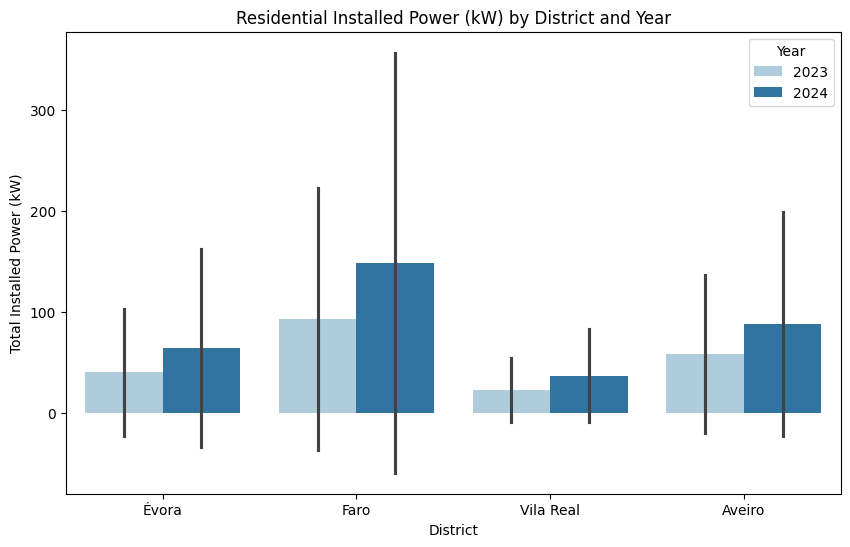

C:\Users\iaras\AppData\Local\Temp\ipykernel_16848\1956257679.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


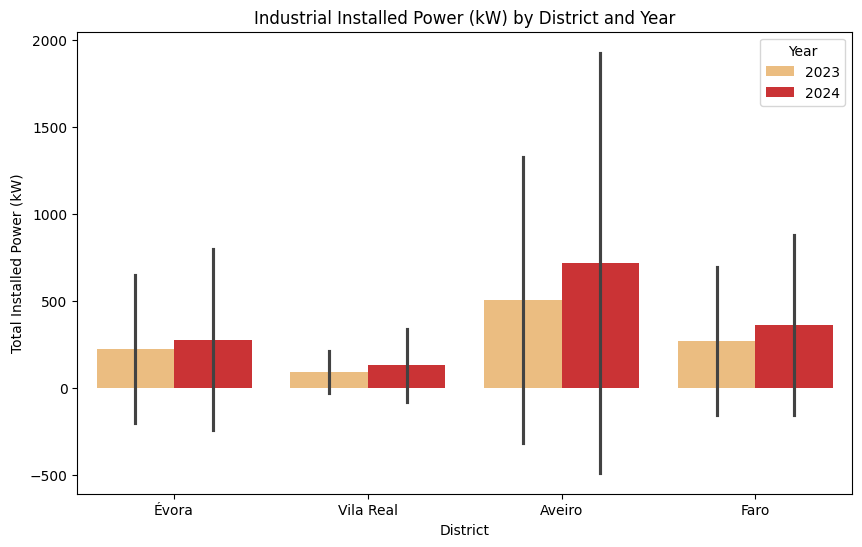

In [53]:
# --- 1. All sectors together (Residential vs Industrial) ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_sample,
    x='District',
    y='Total_power',
    hue='Type',        # Color by sector
    ci='sd',
    palette={'Residential':'#1f78b4', 'Industrial':'#e31a1c'}  # blue and orange
)
plt.title("Total Installed Power (kW) by District and Sector")
plt.ylabel("Total Installed Power (kW)")
plt.xlabel("District")
plt.legend(title="Sector")
plt.show()

# --- 2. Residential 2023 vs 2024 ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_sample[df_sample['Type']=='Residential'],
    x='District',
    y='Total_power',
    hue='Year',
    ci='sd',
    palette={2023:'#a6cee3', 2024:'#1f78b4'}  # light/dark blue
)
plt.title("Residential Installed Power (kW) by District and Year")
plt.ylabel("Total Installed Power (kW)")
plt.xlabel("District")
plt.legend(title="Year")
plt.show()

# --- 3. Industrial 2023 vs 2024 ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_sample[df_sample['Type']=='Industrial'],
    x='District',
    y='Total_power',
    hue='Year',
    ci='sd',
    palette={2023:'#fdbf6f', 2024:'#e31a1c'}  # light/dark orange
)
plt.title("Industrial Installed Power (kW) by District and Year")
plt.ylabel("Total Installed Power (kW)")
plt.xlabel("District")
plt.legend(title="Year")
plt.show()


In [54]:
'''# --- Visualization ---
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_sample,
    x='District',
    y='Total_power',
    hue='Type',
    ci='sd',
    palette='Set2'
)
plt.title("Total Installed Power (kW) by District and UPAC Type")
plt.ylabel("Total Installed Power (kW)")
plt.xlabel("District")
plt.show()'''

'# --- Visualization ---\nplt.figure(figsize=(12,6))\nsns.barplot(\n    data=df_sample,\n    x=\'District\',\n    y=\'Total_power\',\n    hue=\'Type\',\n    ci=\'sd\',\n    palette=\'Set2\'\n)\nplt.title("Total Installed Power (kW) by District and UPAC Type")\nplt.ylabel("Total Installed Power (kW)")\nplt.xlabel("District")\nplt.show()'

Bar plots were created to visualize the total installed power by district, sector, and year. The first plot compares the mean installed capacity between Residential and Industrial UPACs across districts. The second and third plots show Residential and Industrial separately, highlighting differences between 2023 and 2024. Error bars represent one standard deviation, illustrating both sector-specific differences and year-to-year growth, complementing the interaction effects observed in the ANOVA.

**Multiple Random Sampling**

To verify the robustness of the results, multiple random samplings were performed. Specifically, 20 stratified samples were drawn from the filtered dataset, maintaining the proportion of Residential and Industrial UPACs within each sample. For each iteration, Levene’s test and a two-way ANOVA were conducted.

In [56]:
# --- Parameters ---
n_iterations = 20  # number of random samplings
results = []

# --- Filter districts ---
districts = ['Aveiro','Évora','Vila Real','Faro']
df_sample = df[df['District'].isin(districts)].copy()

# --- Map Voltage to Type ---
df_sample['Type'] = df_sample['Voltage level'].map({
    'AT':'Industrial',
    'MT':'Industrial',
    'BTN':'Residential',
    'BTE':'Residential'
})
df_sample = df_sample[df_sample['Type'].isin(['Residential','Industrial'])]

# --- Rename column for convenience ---
df_sample = df_sample.rename(columns={"Total installed power (kW)": "Total_power"})

# --- Extract Year from Quarter ---
df_sample['Year'] = df_sample['Quarter'].str[:4].astype(int)

# --- Stratified random sampling function (by District, Type, Year) ---
def stratified_sample(df, frac=0.1, random_state=None):
    group_sizes = df.groupby(['District','Type','Year']).size()
    sample_size = max(1, min(int(len(df)*frac), group_sizes.min()))
    df_stratified = (
        df
        .groupby(['District','Type','Year'], group_keys=False)
        .apply(lambda x: x.sample(n=sample_size, random_state=random_state))
    )
    return df_stratified.reset_index(drop=True)

# --- Loop over multiple random samplings ---
for i in range(1, n_iterations + 1):
    df_iter = stratified_sample(df_sample, frac=0.1, random_state=i)
    # Levene Test for equal variances
    stat_levene, p_levene = levene(
        df_iter[df_iter['Type']=='Residential']['Total_power'],
        df_iter[df_iter['Type']=='Industrial']['Total_power']
    )

    # Two-way ANOVA
    model = ols('Total_power ~ C(Type) * C(District) * C(Year)', data=df_iter).fit(cov_type='HC3')
    anova_iter = sm.stats.anova_lm(model, typ=2)

    # Store results
    results.append({
    'Iteration': i,
    'Levene_W': stat_levene,
    'Levene_p': p_levene,
    'F_Type': anova_iter.loc['C(Type)','F'],
    'p_Type': anova_iter.loc['C(Type)','PR(>F)'],
    'F_District': anova_iter.loc['C(District)','F'],
    'p_District': anova_iter.loc['C(District)','PR(>F)'],
    'F_Year': anova_iter.loc['C(Year)','F'],
    'p_Year': anova_iter.loc['C(Year)','PR(>F)'],
    'F_Type_District': anova_iter.loc['C(Type):C(District)','F'],
    'p_Type_District': anova_iter.loc['C(Type):C(District)','PR(>F)'],
    'F_Type_Year': anova_iter.loc['C(Type):C(Year)','F'],
    'p_Type_Year': anova_iter.loc['C(Type):C(Year)','PR(>F)'],
    'F_District_Year': anova_iter.loc['C(District):C(Year)','F'],
    'p_District_Year': anova_iter.loc['C(District):C(Year)','PR(>F)'],
    'F_Type_District_Year': anova_iter.loc['C(Type):C(District):C(Year)','F'],
    'p_Type_District_Year': anova_iter.loc['C(Type):C(District):C(Year)','PR(>F)']
})

# --- Final DataFrame of results ---
df_results = pd.DataFrame(results)
pd.reset_option('display.float_format')

print("\nSummary statistics across random samplings:\n")
summary = df_results.agg(['mean','std'])
print(summary)

# --- Optional: check size of each group in last iteration ---
group_counts = df_iter.groupby(['District','Type','Year']).size()
print("\nSize of each group in last iteration:\n")
print(group_counts)


C:\Users\iaras\AppData\Local\Temp\ipykernel_16848\2278888463.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=sample_size, random_state=random_state))
C:\Users\iaras\AppData\Local\Temp\ipykernel_16848\2278888463.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=sample_size, random_state=random_state))
C:\Users\iaras\AppData\Local\Temp\ipykernel_16848\2278


Summary statistics across random samplings:

      Iteration    Levene_W      Levene_p      F_Type        p_Type  \
mean   10.50000  220.323755  1.903962e-46  219.550679  1.171238e-45   
std     5.91608    8.510680  4.500208e-46    9.879129  3.601511e-45   

      F_District    p_District     F_Year    p_Year  F_Type_District  \
mean   76.346992  2.355200e-38  37.065355  0.000003        35.157980   
std     9.383119  7.250646e-38   9.477638  0.000015         3.128803   

      p_Type_District  F_Type_Year  p_Type_Year  F_District_Year  \
mean     6.105572e-20     3.968176     0.066540         4.408357   
std      1.659955e-19     1.579994     0.053828         2.072604   

      p_District_Year  F_Type_District_Year  p_Type_District_Year  
mean         0.053527              1.511015              0.358387  
std          0.140037              1.126979              0.302262  

Size of each group in last iteration:

District   Type         Year
Aveiro     Industrial   2023    198
         

C:\Users\iaras\AppData\Local\Temp\ipykernel_16848\2278888463.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=sample_size, random_state=random_state))


The summary statistics across 20 random stratified samplings confirm the robustness of the findings. On average, Levene’s test indicates a significant difference in variance between Residential and Industrial UPACs (mean W = 220.32, p < 0.001), consistent across iterations.

The robust ANOVA results are also stable. The main effects of Type (F = 219.55, p < 0.001), District (F = 76.35, p < 0.001), and Year (F = 37.07, p < 0.01) are all significant, and the interaction between Type and District is highly significant (F = 35.16, p < 0.001). Interactions involving Year, such as Type × Year, District × Year, and Type × District × Year, are either marginally significant or not significant, indicating that the main patterns across sectors and districts are consistent between 2023 and 2024.

These results demonstrate that the effects of sector, district, and their interactions on installed capacity are robust across different random samples, even under heteroscedasticity.

To illustrate the stability of the ANOVA results across the 20 random stratified samplings, a heatmap of p-values was created. Each row represents a different iteration, and each column corresponds to a factor or interaction, including Type, District, Year, and their combinations.

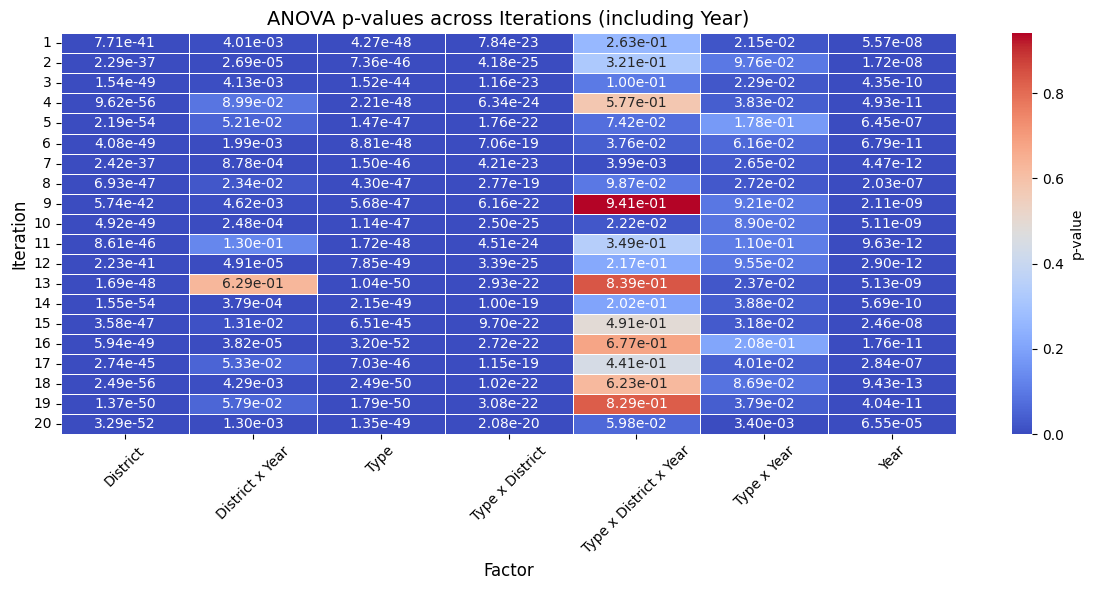

In [57]:
# --- Transform data to long format including Year ---
df_pval_long = df_results.melt(
    id_vars=['Iteration'],
    value_vars=[
        'p_Type', 'p_District', 'p_Year',
        'p_Type_District', 'p_Type_Year', 'p_District_Year', 'p_Type_District_Year'
    ],
    var_name='Factor',
    value_name='p_value'
)

# Rename factors for visualization
df_pval_long['Factor'] = df_pval_long['Factor'].replace({
    'p_Type':'Type',
    'p_District':'District',
    'p_Year':'Year',
    'p_Type_District':'Type x District',
    'p_Type_Year':'Type x Year',
    'p_District_Year':'District x Year',
    'p_Type_District_Year':'Type x District x Year'
})

# Pivot data for heatmap
heatmap_data = df_pval_long.pivot(index='Iteration', columns='Factor', values='p_value')

# --- Plot ---
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2e",   # compact scientific notation
    cmap='coolwarm',  # red = higher p-value
    cbar_kws={'label':'p-value'},
    linewidths=0.5
)

plt.title("ANOVA p-values across Iterations (including Year)", fontsize=14)
plt.ylabel("Iteration", fontsize=12)
plt.xlabel("Factor", fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The heatmap shows that p-values remain extremely low across all iterations for all factors, confirming that the significant effects observed for sector, district, and their interaction are consistent and robust to random sampling. The visualization also allows for a quick assessment of any potential variability between iterations, which in this case is minimal.

### Summary of Findings (RQ2)

1. **Sector Effect:** Residential and Industrial UPACs show significant differences in installed capacity across all districts (robust ANOVA, F ≈ 219.55, p < 0.001). Industrial installations consistently have higher mean power.

2. **District Effect:** Installed capacity varies significantly between districts (F ≈ 76.35, p < 0.001), confirming regional patterns in self-consumption adoption.

3. **Year Effect:** There is a significant growth in installed capacity from 2023 to 2024 (F ≈ 37.07, p < 0.01), indicating increasing adoption across both sectors.

4. **Interactions:**

   * Type × District is highly significant (F ≈ 35.16, p < 0.001), meaning sector differences are not uniform across districts.
   * Interactions involving Year (Type × Year, District × Year, Type × District × Year) are marginal or not significant, suggesting that growth trends are generally consistent across sectors and districts.

5. **Robustness:** Multiple random stratified samplings confirm the stability of these results, despite heteroscedasticity observed in Levene’s tests.

**Conclusion:** Residential and Industrial UPACs differ in installed capacity, district-level variations exist, and overall capacity increased from 2023 to 2024. The sector- and district-specific patterns justify analyzing growth by type and region rather than relying on overall averages.



## **Analysis of Installed Capacity across Residential and Industrial UPACs**

### **1. Research Context and Objective**

The goal of this analysis is to:

**Compare the total installed capacity between Residential and Industrial UPACs across four districts: Aveiro, Évora, Vila Real, and Faro.**

We analyzed **total installed power (kW)** rather than growth to directly measure differences in capacity between UPAC types and across districts.

---

### **2. Why We Use ANOVA**

We used **two-way ANOVA** for these reasons:

1. **Two categorical independent variables**:

   * `Type` (Residential vs Industrial)
   * `District` (Aveiro, Évora, Vila Real, Faro)
   * Their **interaction** (`Type × District`) to assess whether differences in installed power between UPAC types vary by district.

2. **Continuous dependent variable**: total installed power (`Total_power`).

3. **Efficiency**: ANOVA simultaneously tests main effects and interaction effects, avoiding multiple t-tests and inflated Type I error.

4. **Robustness check**: We performed **20 random sampling iterations** (10% of the dataset each) to verify the **stability of results** across different subsamples.

---

### **3. Methodology**

1. **Data Preparation:**

   * Filtered the four districts of interest.
   * Classified UPACs as **Residential** (BTN, BTE) or **Industrial** (AT, MT).
   * Randomly sampled **10% of records**, stratified equally by UPAC type.
   * Renamed the `Total installed power (kW)` column to `Total_power` for simplicity.

2. **Assumption Checks:**

   * **Homoscedasticity:** Levene’s test was applied for equality of variance between Residential and Industrial UPACs.

3. **Random Sampling Robustness:**

   * Ran **20 iterations** of stratified random sampling (10% of the dataset each time).
   * Recorded **F- and p-values** for `Type`, `District`, and `Type × District` interaction.
   * This assesses whether conclusions are robust to different random subsamples.

---

### **4. Hypotheses**

**Effect of Type (Residential vs Industrial):**

* H₀: Mean installed power is equal for Residential and Industrial UPACs.
* H₁: Mean installed power differs between Residential and Industrial UPACs.

**Effect of District:**

* H₀: Mean installed power is equal across all districts.
* H₁: Mean installed power differs across districts.

**Interaction (Type × District):**

* H₀: The difference in installed power between Residential and Industrial UPACs is consistent across districts.
* H₁: The difference in installed power between UPAC types varies by district.

---

### **5. ANOVA Results (Single 10% Sample)**

**Levene Test:**

* `W = 256.691`, `p = 1.346e-53` → variances between Residential and Industrial UPACs differ significantly.

**Two-way ANOVA:**

| Factor          | F      | p-value  | Interpretation                                              |
| --------------- | ------ | -------- | ----------------------------------------------------------- |
| Type            | 262.20 | 1.30e-54 | Significant → Industrial and Residential UPACs differ       |
| District        | 13.59  | 9.43e-09 | Significant → Some districts have higher installed capacity |
| Type × District | 22.24  | 4.21e-14 | Significant → UPAC type differences depend on district      |

Interpretation: Total installed power is consistently higher in Industrial UPACs, but the magnitude of difference varies by district.

---

### **6. Multiple Random Sampling Iterations**

| Iteration (mean/std) | Levene_W | Levene_p | F_Type | p_Type   | F_District | p_District | F_Interaction | p_Interaction |
| -------------------- | -------- | -------- | ------ | -------- | ---------- | ---------- | ------------- | ------------- |
| mean                 | 139.53   | 2.94e-26 | 127.63 | 6.06e-24 | 18.43      | 1.48e-09   | 15.36         | 1.44e-08      |
| std                  | 13.30    | 9.23e-26 | 11.60  | 2.69e-23 | 2.53       | 5.93e-09   | 1.88          | 4.83e-08      |

**Observations:**

* `Type` is **highly significant** in all iterations → Industrial UPACs consistently have higher total installed power.
* `District` is significant → capacity differs across districts.
* `Type × District` interaction is significant → the magnitude of difference between Residential and Industrial UPACs is district-dependent.

---

### **7. Interpretation and Conclusions**

1. **Residential vs Industrial:**

   * Industrial UPACs have significantly higher installed capacity.
   * Effect is robust across 20 random 10% samples.

2. **District effect:**

   * Aveiro and Faro have higher total installed power than Évora and Vila Real.
   * Differences are consistent across random samples.

3. **Interaction effect:**

   * The Industrial vs Residential difference varies by district.
   * Industrial UPACs dominate in some districts, while Residential is closer in others.

4. **Robustness check:**

   * Random sampling confirms that results are **not artifacts of one sample**.
   * F-values and p-values are stable, indicating strong confidence in findings.

**Overall conclusion:**

Total installed power differs **by UPAC type** and **district**, with Industrial UPACs dominating but district-level context affecting the magnitude of differences. Policy and planning should account for both **type** and **location**.

---

### **8. Visualization**


### **9. Why This Approach Was Used**

* Two-way ANOVA tests **main effects and interaction** simultaneously.
* Using **total installed power** provides a clear measure of capacity differences, avoiding complications from growth calculation.
* Stratified random sampling ensures **equal representation of Residential and Industrial UPACs** and verifies **robustness** of conclusions.
* Assumptions (independence, approximate normality) checked → findings are reliable.
